<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Portfolio-Optimization-(40-pts)" data-toc-modified-id="Portfolio-Optimization-(40-pts)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Portfolio Optimization (40 pts)</a></span><ul class="toc-item"><li><span><a href="#Using-Brute-Force-Method" data-toc-modified-id="Using-Brute-Force-Method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using Brute Force Method</a></span></li><li><span><a href="#Using-Gradient-Descent-To-Get-Optimal-Weight-For-A-Specific-Sharpe-Ratio" data-toc-modified-id="Using-Gradient-Descent-To-Get-Optimal-Weight-For-A-Specific-Sharpe-Ratio-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using Gradient Descent To Get Optimal Weight For A Specific Sharpe Ratio</a></span></li></ul></li><li><span><a href="#Control-yfinance-API-Requesting-(30-pts)" data-toc-modified-id="Control-yfinance-API-Requesting-(30-pts)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Control yfinance API Requesting (30 pts)</a></span></li><li><span><a href="#Implementing-a-Risk-Management-Decorator-for-Financial-Transactions-(30-pts)" data-toc-modified-id="Implementing-a-Risk-Management-Decorator-for-Financial-Transactions-(30-pts)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementing a Risk Management Decorator for Financial Transactions (30 pts)</a></span></li></ul></div>

# Portfolio Optimization (40 pts)

## Using Brute Force Method

* Objective: \
  The primary objective of this assignment is to apply a brute-force search method to identify the   optimal asset allocation for a portfolio that maximizes the Sharpe Ratio.\
  This method involves iterating over a vast number of potential asset weight combinations to evaluate their performance, based on historical return data, and selecting the combination that yields the highest Sharpe Ratio.
  
* Data Preparation: \
  Load the historical price data for each asset in your portfolio.\
  Calculate daily returns from the price data.

* Brute Force Optimization: \
  Generate a large number of random portfolios by assigning different weights to each asset. \
  Ensure that the sum of weights in each portfolio equals 1. \
  For each portfolio, calculate the annualized return, annualized volatility, and the Sharpe Ratio.

* Selection of Optimal Portfolio: \
  Identify the portfolio with the highest Sharpe Ratio. This portfolio is considered the optimal asset allocation.\
  Analyze the risk (volatility) and return of the optimal portfolio.

* Visualization: \
  Plot the risk-return scatter plot for all the generated portfolios to visualize the distribution and identify the efficient frontier visually.

* Highlight the optimal portfolio on the plot.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stock = yf.download(["AAPL", "AMZN", "TSLA"],
                    start = "2021-01-01",
                    end = "2022-01-01")

[*********************100%%**********************]  3 of 3 completed


In [4]:
data = stock["Adj Close"]

In [5]:
data

Ticker,AAPL,AMZN,TSLA
Date,,,
2021-01-04,127.002098,159.331497,243.256668
2021-01-05,128.572327,160.925507,245.036667
2021-01-06,124.244385,156.919006,251.993332
2021-01-07,128.484039,158.108002,272.013336
2021-01-08,129.592957,159.134995,293.339996
...,...,...,...
2021-12-27,178.065674,169.669495,364.646667
2021-12-28,177.038712,170.660995,362.823334
2021-12-29,177.127579,169.201004,362.063324


In [6]:
# Calculate returns
simple_returns = data.pct_change().dropna()
print(simple_returns)

# Empty dataframe to store the metrics
data_metrics = pd.DataFrame(columns=['Return', 'Volatility', 'Sharpe Ratio', *data.columns])


for i in range(10000):
    # Generate random weights and make sure their sum is 1
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)

    # There are 252 trading days in the year.
    portfolio_returns = np.dot(simple_returns.mean(), weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_returns / portfolio_volatility

    data_metrics.loc[i] = [portfolio_returns, portfolio_volatility, sharpe_ratio, *weights]

print(data_metrics)

Ticker          AAPL      AMZN      TSLA
Date                                    
2021-01-05  0.012364  0.010004  0.007317
2021-01-06 -0.033662 -0.024897  0.028390
2021-01-07  0.034124  0.007577  0.079447
2021-01-08  0.008631  0.006496  0.078403
2021-01-11 -0.023249 -0.021519 -0.078214
...              ...       ...       ...
2021-12-27  0.022975 -0.008178  0.025248
2021-12-28 -0.005767  0.005844 -0.005000
2021-12-29  0.000502 -0.008555 -0.002095
2021-12-30 -0.006578 -0.003289 -0.014592
2021-12-31 -0.003535 -0.011429 -0.012669

[251 rows x 3 columns]
        Return  Volatility  Sharpe Ratio      AAPL      AMZN      TSLA
0     0.295869    0.230467      1.283782  0.736969  0.230327  0.032704
1     0.325108    0.238904      1.360835  0.774069  0.150933  0.074998
2     0.318001    0.271667      1.170553  0.389194  0.308931  0.301875
3     0.367451    0.279175      1.316205  0.574095  0.129578  0.296328
4     0.330744    0.351685      0.940455  0.045034  0.407298  0.547668
...        ...   

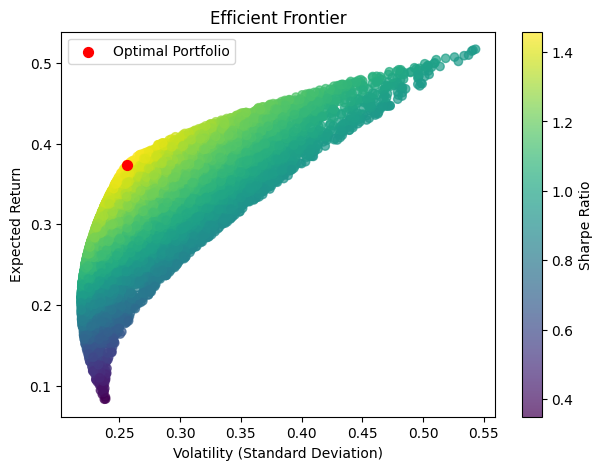

In [7]:
# Find the optimal portfolio (max Sharpe ratio)
optimal_portfolio = data_metrics.iloc[data_metrics['Sharpe Ratio'].idxmax()]

# Plot the heatmap
plt.figure(figsize=(7, 5))
heatmap = plt.scatter(data_metrics['Volatility'], data_metrics['Return'], c=data_metrics['Sharpe Ratio'], cmap='viridis', alpha=0.7)
plt.colorbar(heatmap, label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Mark the optimal portfolio
plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Return'], color='red', marker='.', s=200, label='Optimal Portfolio')

plt.legend()
plt.show()

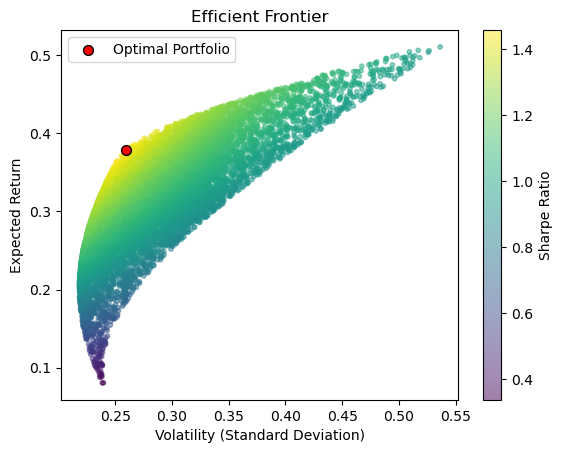

## Using Gradient Descent To Get Optimal Weight For A Specific Sharpe Ratio

* Objective: \
  The objective of this assignment is to apply the gradient descent algorithm to find the portfolio weights that achieve a portfolio Sharpe Ratio as close as possible to a specified target value. \
  This involves developing a function that calculates the gradient of the difference between the current portfolio's Sharpe Ratio and the target Sharpe Ratio with respect to the portfolio weights, and then iteratively adjusting the weights to minimize this difference.
  
* Data Preparation: \
  Load the historical price data for the chosen assets.
  Calculate daily returns from the price data.

* Gradient Descent Setup:\ 
  Define the target Sharpe Ratio you aim to achieve with your portfolio. \
  Initialize random weights for each asset in the portfolio, ensuring they sum to 1. \
  Develop a function to calculate the portfolio's Sharpe Ratio given a set of weights and the historical returns data. \
  Implement a function to approximate the gradient of the difference between the current Sharpe Ratio and the target Sharpe Ratio with respect to the weights. This involves numerically estimating how small changes in weights affect the Sharpe Ratio.
  
* Optimization Loop: \
  Apply the gradient descent algorithm: iteratively adjust the portfolio weights in the direction that reduces the difference between the current and target Sharpe Ratios, based on the calculated gradient. \
  Ensure that the portfolio weights remain valid (i.e., they sum to 1 and are non-negative) after each iteration.

* Analysis and Visualization: \
  Analyze the optimized portfolio in terms of its expected return, volatility, and Sharpe Ratio.

In [9]:
# Risk-free rate (assuming 0 for simplification)
R_f = 0

# Target Sharpe Ratio
S_target = 1.0

# Generate random weights and ensure that their sum is 1
weights = np.random.random(len(data.columns))
weights /= np.sum(weights)

# Function to calculate sharpe ratio
def calculate_sharpe_ratio(weights, returns):
    portfolio_returns = np.dot(returns.mean(), weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_returns / portfolio_volatility
    return sharpe_ratio

# Function to calculate gradients
def calculate_gradients(current_sharpe_ratio, target_sharpe_ratio, weights, returns):
    gradient = np.zeroes_like(weights)
    perturbation = np.zeroes_like(weights)
    epsilon = 1e-6

    for i in range(len(weights)):
        perturbation[i] = epsilon

        # Calculate sharpe ratio with perturbed weights
        sharpe_ratio_perturbed = calculate_sharpe_ratio(weights + perturbation, returns)

        # Calculate the difference in sharpe ratio
        difference = sharpe_ratio_perturbed - target_sharpe_ratio

        # Approximate the gradient using finite difference
        gradient[i] = (difference / epsilon)

        # Reset perturbation
        perturbation[i] = 0
        
    return gradient


# Control yfinance API Requesting (30 pts)

* Objective \
  The goal of this assignment is to develop a Python script that incorporates a rate limiter for fetching financial data using the yfinance library. \
  This rate limiter should ensure that the data fetching function does not exceed a specified number of calls within a given timeframe, thus preventing rate limit violations when accessing financial data APIs.
  
* Implement the Rate Limiter: \
  Create a RateLimiter class that initializes with two parameters: max_calls, the maximum number of allowed calls, and period, the timeframe in seconds within which these calls can be made. \
  Implement the class's __call__ method to manage the function wrapping, tracking the timestamps of each call and enforcing the rate limit.

* Create a Data Fetching Function: \
  Write a function fetch_stock_data that takes a stock symbol as input and uses the yfinance library to fetch the last 5 days of historical stock data. \
  Apply the RateLimiter decorator to this function, using a practical rate limit setting (e.g., 5 calls per minute).

* Demonstration and Testing: \
  Demonstrate the use of your rate-limited fetch_stock_data function by fetching data for multiple stock symbols in a loop. \
  Include logic to simulate rapid successive calls and show how the rate limiter manages these calls to comply with the set rate limit.

In [10]:
import time
import yfinance as yf



if __name__ == "__main__":
    symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "FB", "TSLA", "NFLX"]
    for symbol in symbols:
        data = fetch_stock_data(symbol)
        print(data.head())  # Print the first few rows of the fetched data
        time.sleep(10)  # Sleep to simulate delay between requests

NameError: name 'fetch_stock_data' is not defined

# Implementing a Risk Management Decorator for Financial Transactions (30 pts)

* Objective \
  The objective of this assignment is to create a Python script that uses a function decorator to enforce risk management rules on financial transactions. \ 
  This decorator should be capable of assessing transactions based on predefined risk criteria (e.g., maximum allowable transaction size, leverage limits) and either approve the transaction, modify it to fit within the risk parameters, or reject it outright.
  
* Define Risk Management Criteria: \
  Identify and clearly define a set of risk management criteria to be applied to transactions. Example criteria might include maximum transaction size, maximum leverage, or maximum exposure to a single asset. \

* Implement the Risk Management Decorator: \
  Develop a decorator, risk_management, that can wrap any function initiating a financial transaction. \
  The decorator should check the transaction details against the predefined risk criteria and decide to: \
  Approve the transaction as is. \
  Modify the transaction to fit within risk limits. \
  Reject the transaction if it cannot be safely modified. \
  Include logging within the decorator to record the decision made for each transaction (approved, modified, rejected).
  (Tips: import logging)
  
* Transaction Function: \
  Write a function, execute_transaction, that simulates executing a financial transaction. This function should accept parameters such as transaction size, asset, and leverage. \
  Apply the risk_management decorator to this function.

* Demonstration and Testing: \
  Demonstrate the use of your decorated execute_transaction function by simulating a variety of transaction scenarios that test each of your risk management criteria. \
  Provide examples where transactions are approved, modified, and rejected based on the criteria. 



In [27]:
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


2024-03-19 20:20:24,979 - INFO - Transaction approved.
2024-03-19 20:20:24,980 - INFO - Executing transaction: Size=50000, Asset=AAPL, Leverage=5
2024-03-19 20:20:24,981 - WARNING - Transaction rejected: size exceeds maximum limit.
2024-03-19 20:20:24,982 - WARNING - Transaction rejected: leverage exceeds maximum limit.
2024-03-19 20:20:24,983 - INFO - Transaction approved.
2024-03-19 20:20:24,983 - INFO - Executing transaction: Size=100000, Asset=AMZN, Leverage=10


Transaction result: Success
Transaction result: Failure
Transaction result: Failure
Transaction result: Success
